In [3]:
%matplotlib inline

# system
import os
import importlib
import datetime

# scipy
import numpy as np # type: ignore
from scipy import signal # type: ignore

# matplotlib
import matplotlib.pyplot as plt # type: ignore

# grandlib
import grand.dataio.root_trees as rt # type: ignore

#import tools
import database.tools as tools

plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

savefig  = True
plot_dir = '/pbs/home/p/pcorrea/grand/nutrig/plots'

colors = ['b','m','r']

In [2]:
# root_file = '/sps/grand/data/gp13/GrandRoot/2024/02/GP13_20240208_142053_RUN125_MD_RAW_10s_ChanXYZ_20dB_12DUs_test_103_dat.root'
#root_file  = '/sps/grand/data/gp13/GrandRoot/2024/03/GP13_20240319_161913_RUN125_MD_RAW_10s_ChanXYZ_20dB_6DUs_test_067.root'
root_file = '/sps/grand/data/gp13/GrandRoot/2024/03/GP13_20240314_041623_RUN125_MD_RAW_10s_ChanXYZ_20dB_11DUs_test_362_dat.root'

df   = rt.DataFile(root_file)
tadc = df.tadc

n_traces = tadc.get_number_of_entries()
traces   = np.zeros( (n_traces,3,1024) )

for i in range(n_traces):
    tadc.get_entry(i)
    traces[i] = np.array(tadc.trace_ch[0][1:])

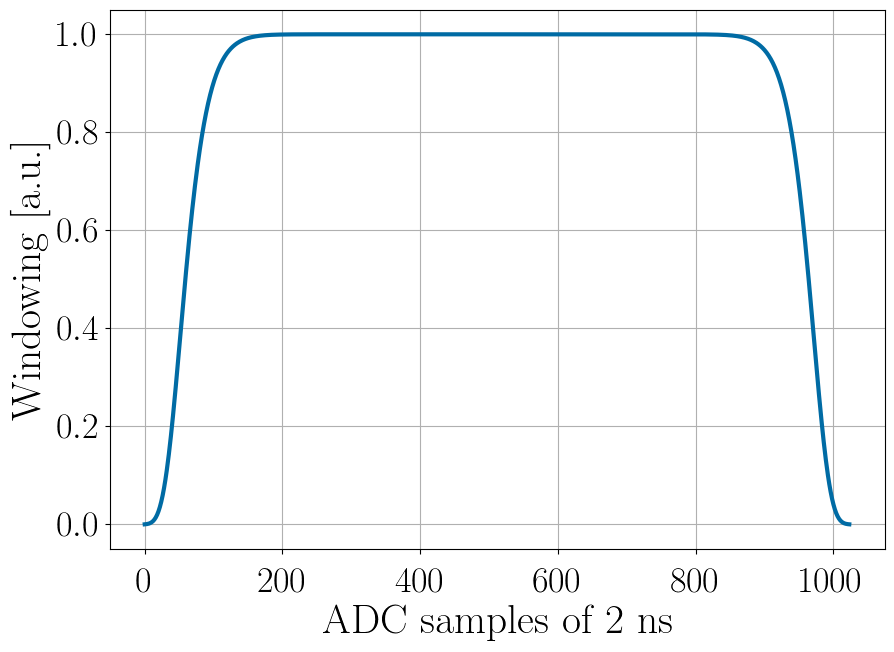

In [3]:
window = signal.windows.general_gaussian(traces.shape[-1],10,traces.shape[-1]/2.3)
plt.plot(window)
plt.xlabel('ADC samples of 2 ns')
plt.ylabel('Windowing [a.u.]')
plt.show()

In [6]:
fft  = np.fft.rfft(traces)
freq = np.fft.rfftfreq(1024,d=1/500)

In [7]:
importlib.reload(tools)

#traces_filtered = tools.filter_traces(traces,freq_highpass=43,freqs_notch=[118.9,132.8,137.8],bw_notch=[3,2.5,1.]) #freqs_notch=[119,133,138] bw_notch=[2.5,2.5,1.]
traces_filtered = tools.filter_traces(traces)
fft_filtered    = np.fft.rfft(traces_filtered)

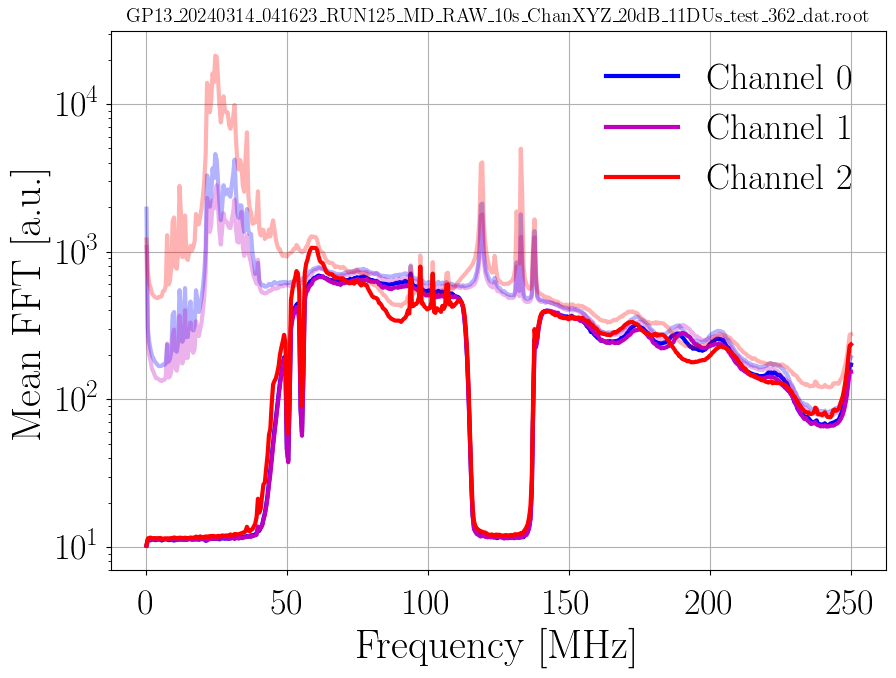

In [8]:
fft_mean          = np.mean(np.abs(fft),axis=0)
fft_mean_filtered = np.mean(np.abs(fft_filtered),axis=0)

for ch in range(fft_mean.shape[0])[:]:
    plt.plot(freq,fft_mean[ch],color=colors[ch],alpha=.3)
    plt.plot(freq,fft_mean_filtered[ch],label=f'Channel {ch}',color=colors[ch])

plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Mean FFT [a.u.]')
plt.legend()
plt.title(os.path.basename(root_file),fontsize=14)
#plt.xlim([110,120])
plt.show()

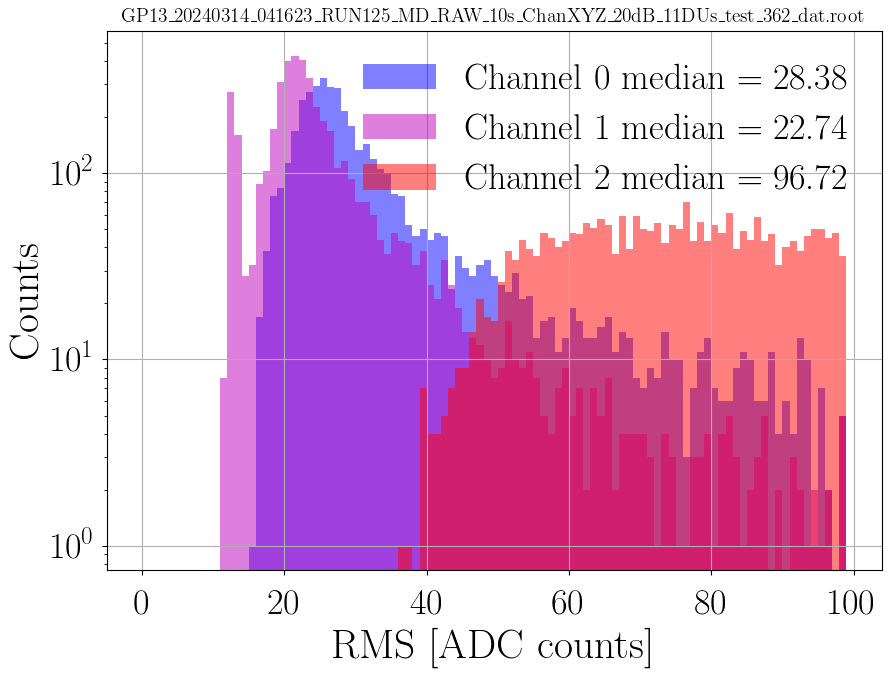

In [7]:
rms = np.sqrt( np.mean( traces**2,axis=2 ) )
bins = np.arange(0,100)

for ch in range(rms.shape[1]):
    median = np.median(rms[:,ch])
    plt.hist(rms[:,ch],bins=bins,alpha=.5,label=f'Channel {ch} median = {np.round(median,decimals=2)}',color=colors[ch])

plt.yscale('log')
plt.xlabel('RMS [ADC counts]')
plt.ylabel('Counts')
plt.title(os.path.basename(root_file),fontsize=14)
plt.legend()
plt.show()

12.851762381980267 1.752455378885817


12.357599025491242 1.6404805749261842
14.785116021499594 3.4954286152078917


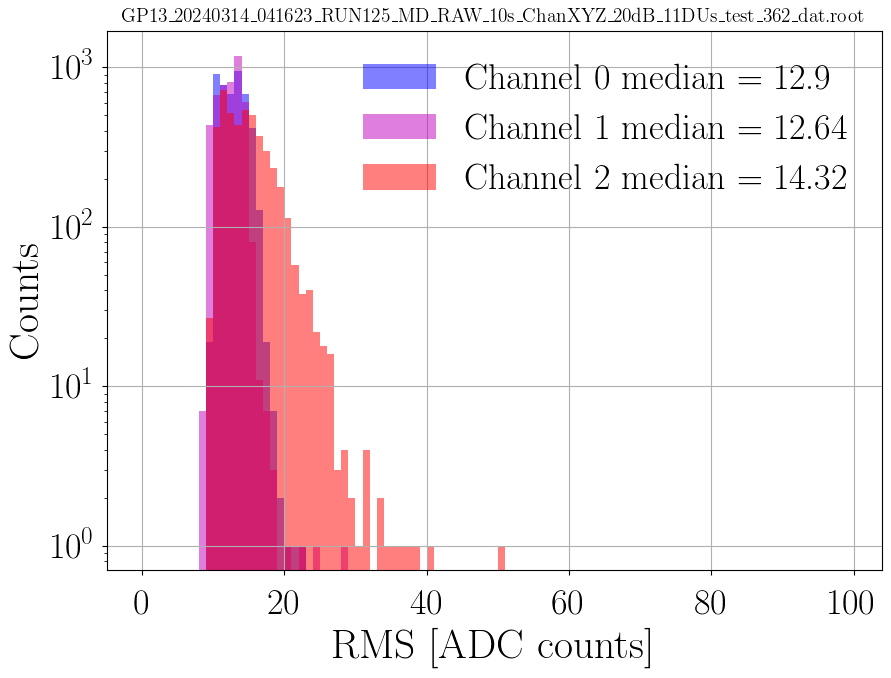

In [8]:
rms_filtered = np.sqrt( np.mean( traces_filtered**2,axis=2 ) )
bins         = np.arange(0,100)

for ch in range(rms_filtered.shape[1]):
    median = np.median(rms_filtered[:,ch])
    print(np.mean(rms_filtered[:,ch]),np.std(rms_filtered[:,ch]))
    plt.hist(rms_filtered[:,ch],bins=bins,alpha=.5,label=f'Channel {ch} median = {np.round(median,decimals=2)}',color=colors[ch])

plt.yscale('log')
plt.xlabel('RMS [ADC counts]')
plt.ylabel('Counts')
plt.title(os.path.basename(root_file),fontsize=14)
plt.legend()
plt.show()

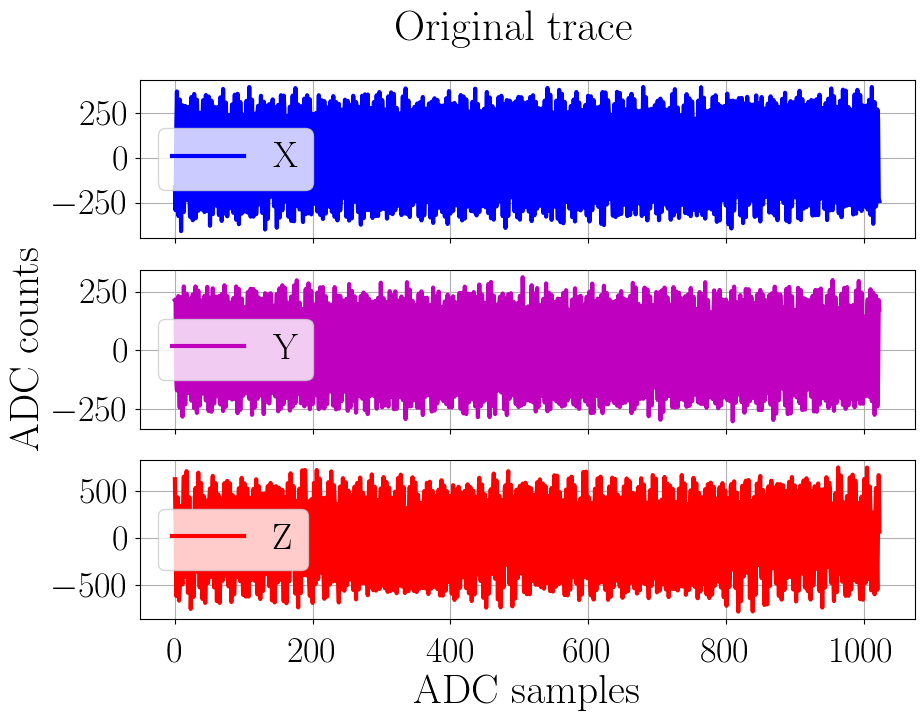

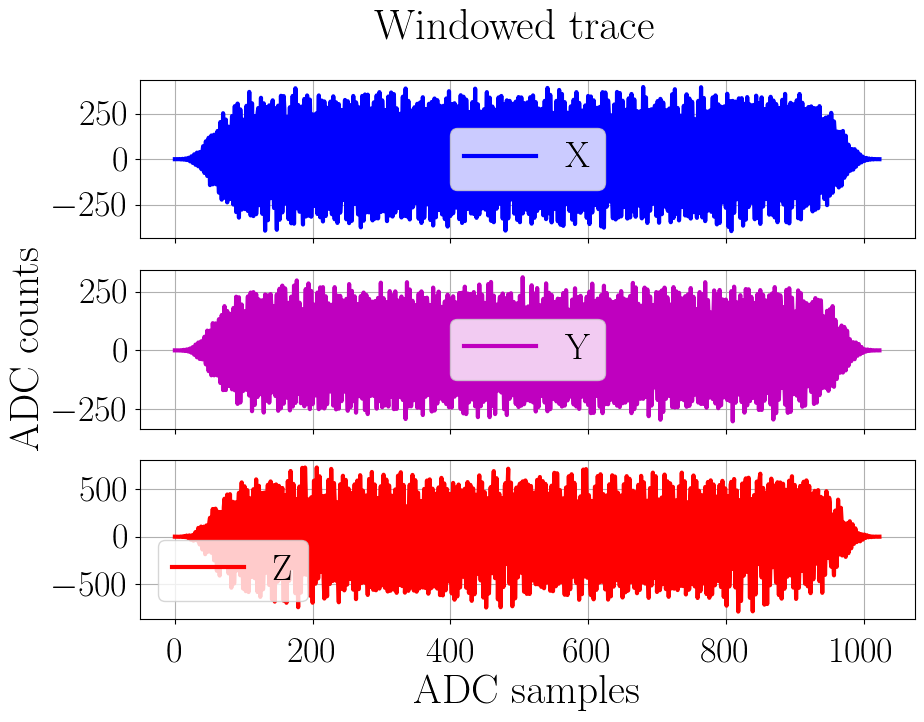

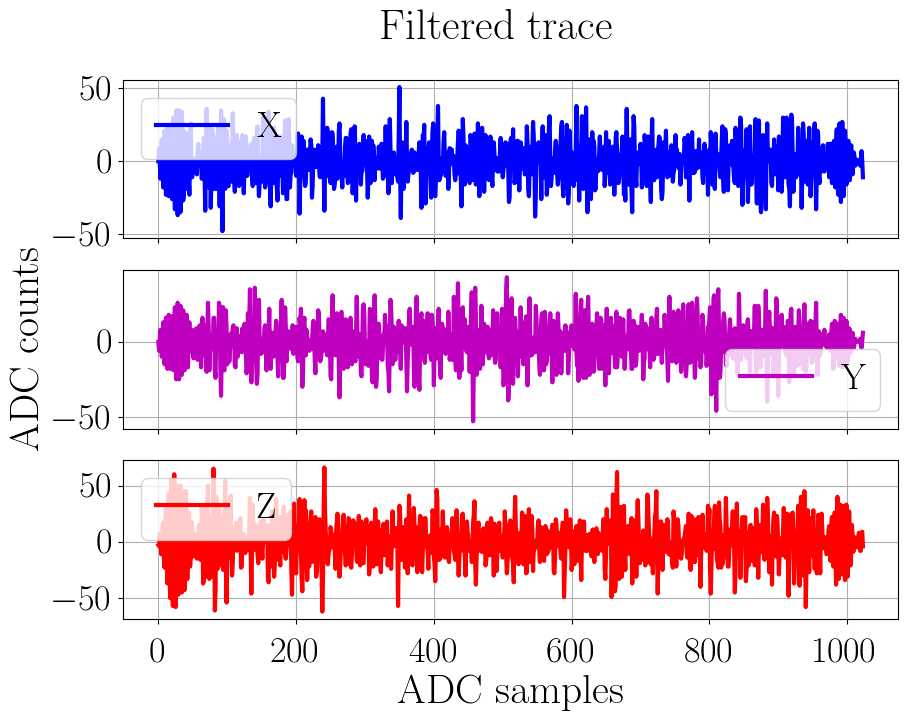

In [6]:
idx = 400#399

tr      = traces[idx]
tr_filt = traces_filtered[idx]


fig, ax = plt.subplots(3,1,sharex=True)

ax[0].plot(tr[0],color='b',label='X')
ax[1].plot(tr[1],color='m',label='Y')
ax[2].plot(tr[2],color='r',label='Z')

ax[2].set_xlabel('ADC samples')
ax[1].set_ylabel('ADC counts')

ax[0].legend(frameon=True,framealpha=.8)
ax[1].legend(frameon=True,framealpha=.8)
ax[2].legend(frameon=True,framealpha=.8)

plt.suptitle('Original trace',va='top')

plt.show()


window = signal.windows.general_gaussian(traces.shape[-1],10,traces.shape[-1]/2.3)
fig, ax = plt.subplots(3,1,sharex=True)

ax[0].plot(tr[0]*window,color='b',label='X')
ax[1].plot(tr[1]*window,color='m',label='Y')
ax[2].plot(tr[2]*window,color='r',label='Z')

ax[2].set_xlabel('ADC samples')
ax[1].set_ylabel('ADC counts')

ax[0].legend(frameon=True,framealpha=.8)
ax[1].legend(frameon=True,framealpha=.8)
ax[2].legend(frameon=True,framealpha=.8)

plt.suptitle('Windowed trace',va='top')

plt.show()


fig, ax = plt.subplots(3,1,sharex=True)

ax[0].plot(tr_filt[0],color='b',label='X')
ax[1].plot(tr_filt[1],color='m',label='Y')
ax[2].plot(tr_filt[2],color='r',label='Z')

ax[2].set_xlabel('ADC samples')
ax[1].set_ylabel('ADC counts')

ax[0].legend(frameon=True,framealpha=.8)
ax[1].legend(frameon=True,framealpha=.8)
ax[2].legend(frameon=True,framealpha=.8)

plt.suptitle('Filtered trace',va='top')

plt.show()

119.140625


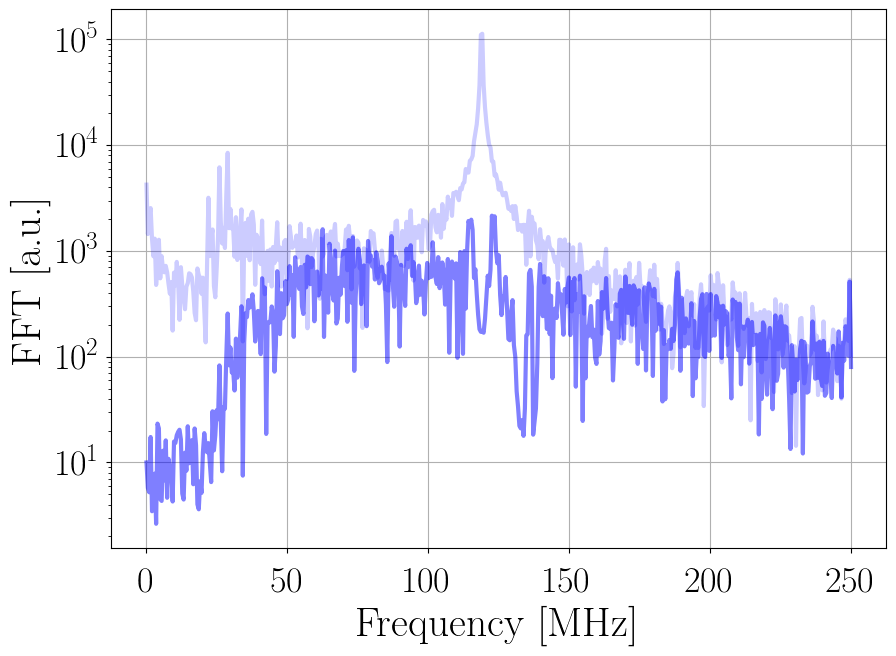

In [20]:
fig, ax = plt.subplots()

fft_idx          = np.abs(fft[idx])
fft_filtered_idx = np.abs(fft_filtered[idx])

ax.plot(freq,fft_filtered_idx[0],color='b',label='X',alpha=.5)
# ax.plot(freq,fft_filtered_idx[1],color='m',label='Y',alpha=.5)
# ax.plot(freq,fft_filtered_idx[2],color='r',label='Z',alpha=.5)

ax.plot(freq,fft_idx[0],color='b',label='X',alpha=.2)
# ax.plot(freq,fft_idx[1],color='m',label='Y',alpha=.2)
# ax.plot(freq,fft_idx[2],color='r',label='Z',alpha=.2)

ax.set_yscale('log')

ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('FFT [a.u.]')

print(freq[np.argmax(fft_idx[0])])

plt.show()

## Test threshold trigger

In [ ]:
importlib.reload(tools)

thresh1 = 35
thresh2 = 25 # 60% of th1

for i, trace in enumerate(traces_filtered[:300]):
    # thresh1 = 3*rms_filtered[i,0]
    # thresh2 = 2*rms_filtered[i,0]
    print(i)
    print(tools.thresh_trigger(trace,threshold1=thresh1,threshold2=thresh2,samples_from_trace_edge=0))

0
[67, 99]
1 1
[353, 385]
1 1
[745, 777]
1 4
(0, 0, -1)
1
(0, 0, -1)
2
[283, 315]
1 2
[556, 588]
1 1
(0, 0, -1)
3
(0, 0, -1)
4
[0, 25]
1 2
[111, 143]
1 2
[188, 220]
1 1
[367, 399]
1 1
[388, 420]
1 3
[560, 598]
1 2
(0, 0, -1)
5
(0, 0, -1)
6
(0, 0, -1)
7
[176, 208]
1 2
[566, 598]
1 1
[941, 973]
1 1
[0, 24]
1 1
[479, 511]
1 1
[593, 625]
1 1
(0, 0, -1)
8
[0, 25]
1 2
[614, 650]
1 4
[760, 795]
1 4
[37, 98]
1 6
[619, 651]
1 1
(0, 0, -1)
9
(0, 0, -1)
10
[819, 851]
1 2
[953, 986]
1 3
(0, 0, -1)
11
(0, 0, -1)
12
(0, 0, -1)
13
(0, 0, -1)
14
[619, 651]
1 2
[991, 1023]
1 5
(0, 0, -1)
15
[54, 86]
1 1
[73, 105]
1 1
[645, 692]
1 3
[942, 984]
1 3
[1005, 1023]
1 2
[282, 314]
1 2
[555, 587]
1 1
[616, 671]
1 4
[817, 849]
1 1
(0, 0, -1)
16
(0, 0, -1)
17
(0, 0, -1)
18
[186, 218]
1 2
[486, 518]
1 1
(0, 0, -1)
19
[16, 48]
1 1
[38, 83]
1 2
[241, 273]
1 1
[121, 159]
2 5
(0, 0, -1)
20
[372, 409]
2 5
[568, 607]
1 2
(0, 0, -1)
21
(0, 0, -1)
22
[242, 274]
1 1
[778, 812]
1 2
(0, 0, -1)
23
(0, 0, -1)
24
[0, 104]
13 2

In [2]:
idx     = 205
#tr_filt = traces_filtered[idx]
tr_filt = np.abs( traces_filtered[idx] )

fig, ax = plt.subplots(3,1,sharex=True)

ax[0].plot(tr_filt[0],color='b',label='X')
ax[1].plot(tr_filt[1],color='m',label='Y')
ax[2].plot(tr_filt[2],color='r',label='Z')

ax[0].axhline(thresh1,color='k',alpha=.7)
ax[0].axhline(thresh2,color='k',alpha=.4)
ax[1].axhline(thresh1,color='k',alpha=.7)
ax[1].axhline(thresh2,color='k',alpha=.4)

# ax[0].axvline(452,color='g',ls=':',alpha=1)
# ax[0].axvline(452+25,color='orange',ls=':',alpha=1)

ax[2].set_xlabel('ADC samples')
ax[1].set_ylabel('ADC counts')

ax[0].legend(frameon=True,framealpha=.8)
ax[1].legend(frameon=True,framealpha=.8)
ax[2].legend(frameon=True,framealpha=.8)

#plt.xlim([350,500])

plt.show()

NameError: name 'traces_filtered' is not defined

In [5]:
f = np.load('/sps/grand/pcorrea/nutrig/datasets/sig/rfv2_thresh_30/sig_traces_with_noise_zhaires_proton_rfv2_thresh_30_files_8000_8500_seed_21.npz')

traces_sig = f['traces']
snr_sig    = f['snr']

In [33]:
snr_sig[:,1].max()
print(snr_sig[4413])

[ 85.43247113 234.37991155  19.1265902 ]


In [90]:
importlib.reload(tools)

thresh1 = 35+1
thresh2 = 25+1 # 60% of th1

for i,trace in enumerate(traces_sig[0:1000]):
    if snr_sig[i,0]>=4 and snr_sig[i,0]<4.2:
        print(i,snr_sig[i])
        print(tools.thresh_trigger(trace,thresh1=thresh1,thresh2=thresh2))

90 [4.07890483 0.32563709 0.98921362]
(0, 0, -1)
98 [4.10113324 0.28576238 0.69437422]
(0, 0, -1)
104 [4.09730282 0.27317409 0.99083495]
(0, 0, -1)
147 [4.15754887 0.30110313 1.1060245 ]
[80, 137]
1 7
[320, 365]
4 8
[136, 171]
1 4
[284, 319]
1 3
[307, 354]
1 3
[474, 508]
1 2
[612, 644]
1 3
[681, 732]
1 6
(1, 1, 336)
312 [ 4.14955007 18.27221866  1.38690935]
[280, 324]
5 8
(1, 2, 296)
404 [4.14498115 1.18871214 0.59928405]
[104, 136]
1 1
[509, 545]
2 6
[31, 66]
1 3
[603, 642]
1 3
(1, 1, 525)
444 [ 4.09347298 20.22379997  0.9480685 ]
[302, 339]
4 5
[36, 72]
1 3
[302, 360]
9 12
(1, 2, 318)
470 [4.15405403 0.24169881 0.69787865]
(0, 0, -1)
482 [4.12606323 0.70635272 0.37072611]
[0, 1023]
515 672
(0, 0, -1)
624 [4.05152989 1.52059947 1.06855612]
[14, 46]
1 1
[149, 181]
1 2
[819, 854]
3 4
(0, 0, -1)
626 [4.14098555 1.23696992 0.5911418 ]
[210, 248]
3 5
(0, 0, -1)
632 [4.08526536 5.71811126 1.36260945]
[662, 709]
5 6
[662, 702]
5 6
(2, 12, 678)
912 [ 4.18114502 27.04995693  1.53587713]
[621, 

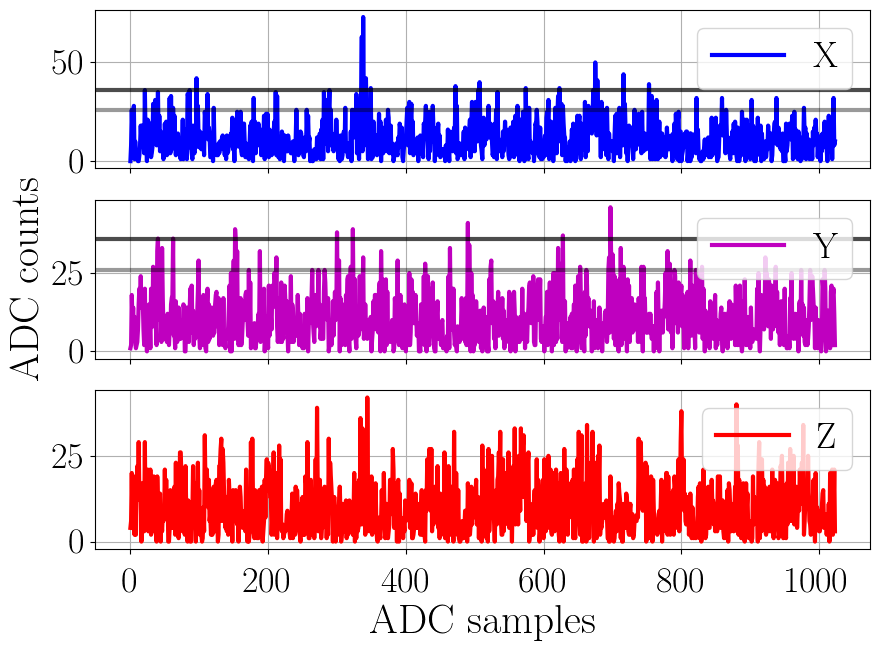

In [89]:
idx    = 147
tr_sig = traces_sig[idx]
tr_sig = np.abs( traces_sig[idx] )

fig, ax = plt.subplots(3,1,sharex=True)

ax[0].plot(tr_sig[0],color='b',label='X')
ax[1].plot(tr_sig[1],color='m',label='Y')
ax[2].plot(tr_sig[2],color='r',label='Z')

ax[0].axhline(thresh1,color='k',alpha=.7)
ax[0].axhline(thresh2,color='k',alpha=.4)
ax[1].axhline(thresh1,color='k',alpha=.7)
ax[1].axhline(thresh2,color='k',alpha=.4)

# ax[0].axvline(469,color='g',ls=':',alpha=1)
# ax[0].axvline(469+25,color='orange',ls=':',alpha=1)

ax[2].set_xlabel('ADC samples')
ax[1].set_ylabel('ADC counts')

ax[0].legend(frameon=True,framealpha=.8)
ax[1].legend(frameon=True,framealpha=.8)
ax[2].legend(frameon=True,framealpha=.8)

#plt.xlim([600,700])

plt.show()

### Estimate threshold for a given trigger rate

In [5]:
trace_length = 1024*2 # [ns]
trigger_rate = 1e3 # [Hz]

data_taking_fraction_MD = trace_length / 1e10 # for 10s = 10^10 ns forced-trigger MD data

trigger_rate_MD = trigger_rate * data_taking_fraction_MD

trigger_rate_MD

0.00020480000000000002

In [3]:
#root_file = '/sps/grand/data/gp13/GrandRoot/2024/02/GP13_20240208_142053_RUN125_MD_RAW_10s_ChanXYZ_20dB_12DUs_test_103_dat.root'
#root_file  = '/sps/grand/data/gp13/GrandRoot/2024/03/GP13_20240319_161913_RUN125_MD_RAW_10s_ChanXYZ_20dB_6DUs_test_067.root'
root_file = '/sps/grand/data/gp13/GrandRoot/2024/03/GP13_20240314_041623_RUN125_MD_RAW_10s_ChanXYZ_20dB_11DUs_test_362_dat.root'

df   = rt.DataFile(root_file)
tadc = df.tadc

n_traces = tadc.get_number_of_entries()
traces   = np.zeros( (n_traces,3,1024) )
du_ids   = np.zeros( (n_traces) )

for i in range(n_traces):
    tadc.get_entry(i)

    traces[i] = np.array(tadc.trace_ch[0][1:])
    du_ids[i] = tadc.du_id[0]

In [4]:
tadc.get_entry(0)
start_time = datetime.datetime.fromtimestamp(tadc.gps_time[0],tz=datetime.timezone(datetime.timedelta(hours=8)))
tadc.get_entry(tadc.get_number_of_entries()-1)
end_time   = datetime.datetime.fromtimestamp(tadc.gps_time[0],tz=datetime.timezone(datetime.timedelta(hours=8)))

end_time-start_time

datetime.timedelta(seconds=5100)

In [5]:
fft  = np.fft.rfft(traces)
freq = np.fft.rfftfreq(traces.shape[-1],d=1/500)
rms  = np.sqrt( np.mean(traces**2,axis=2) )

psd_norm  = 1. / traces.shape[-1]**2 / np.diff(freq)[0] # [MHz^-1]

In [6]:
traces_filtered = tools.filter_traces(traces)#tools.filter_traces(traces,freq_highpass=43,freqs_notch=[118.9,132.8,137.8],bw_notch=[3,2.5,1.]) #freqs_notch=[119,133,138] bw_notch=[2.5,2.5,1.]
fft_filtered    = np.fft.rfft(traces_filtered)
rms_filtered    = np.sqrt( np.mean(traces_filtered**2,axis=2) )

colors   = ['b','m','r']
channels = ['X','Y','Z']

In [7]:
mask_dict = {du : np.zeros(du_ids.shape,dtype=bool) for du in tadc.get_list_of_dus()}

for i, du in enumerate(du_ids):
    mask_dict[du][i] = True

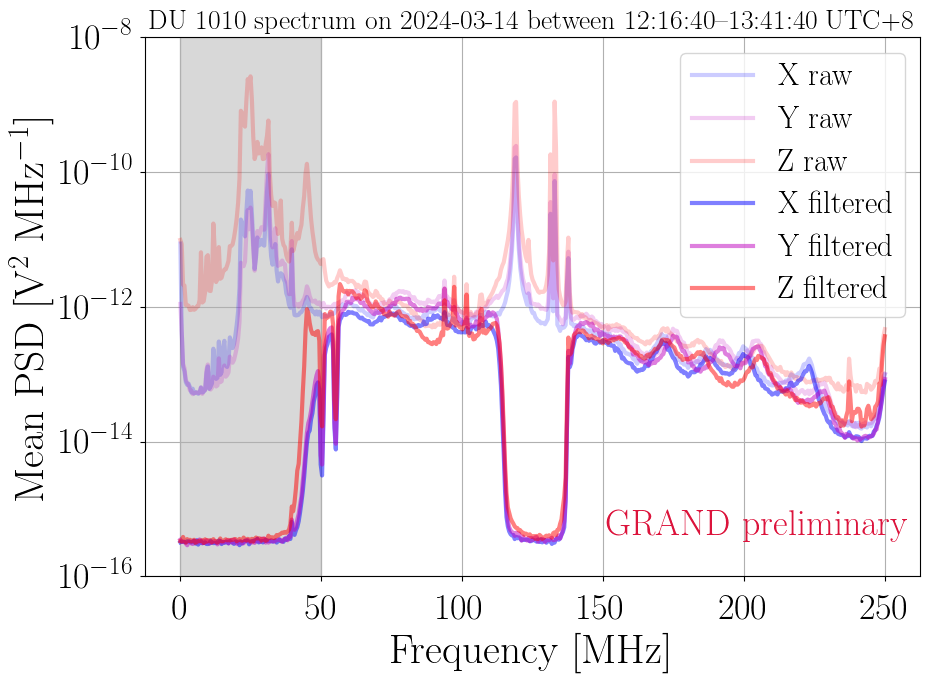

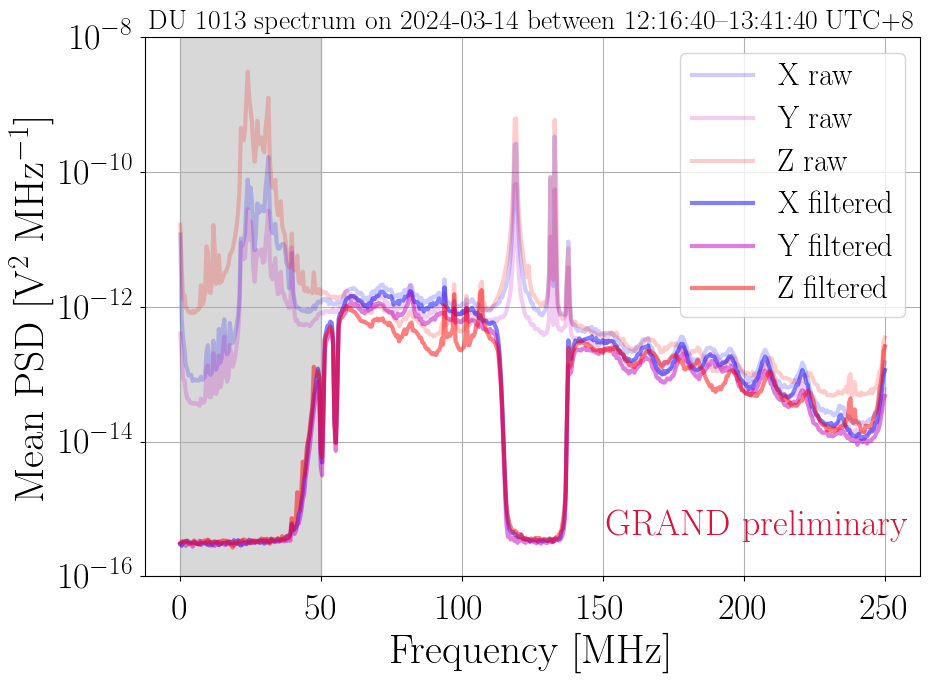

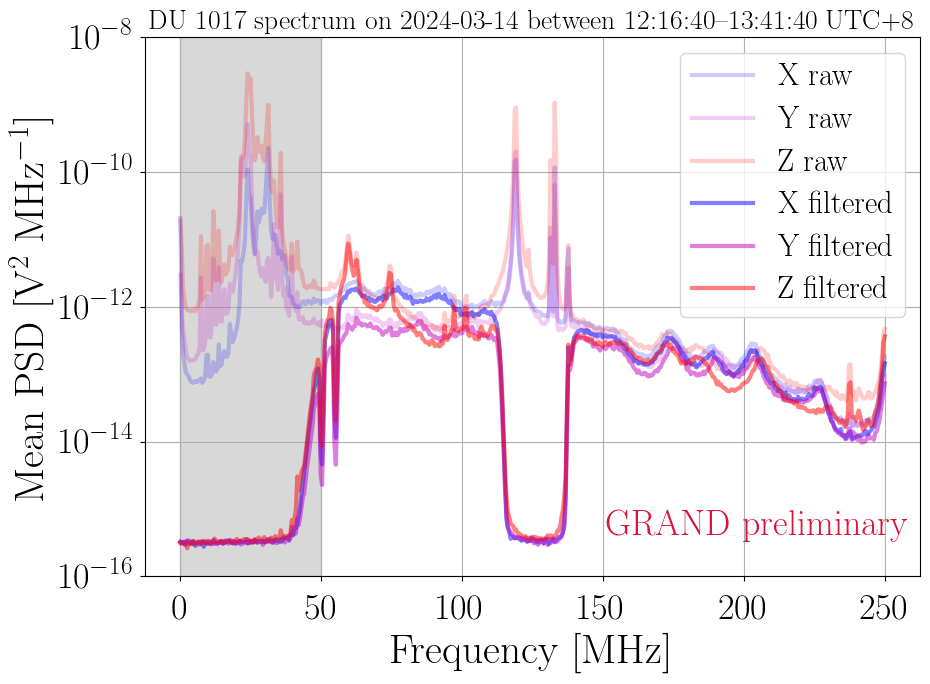

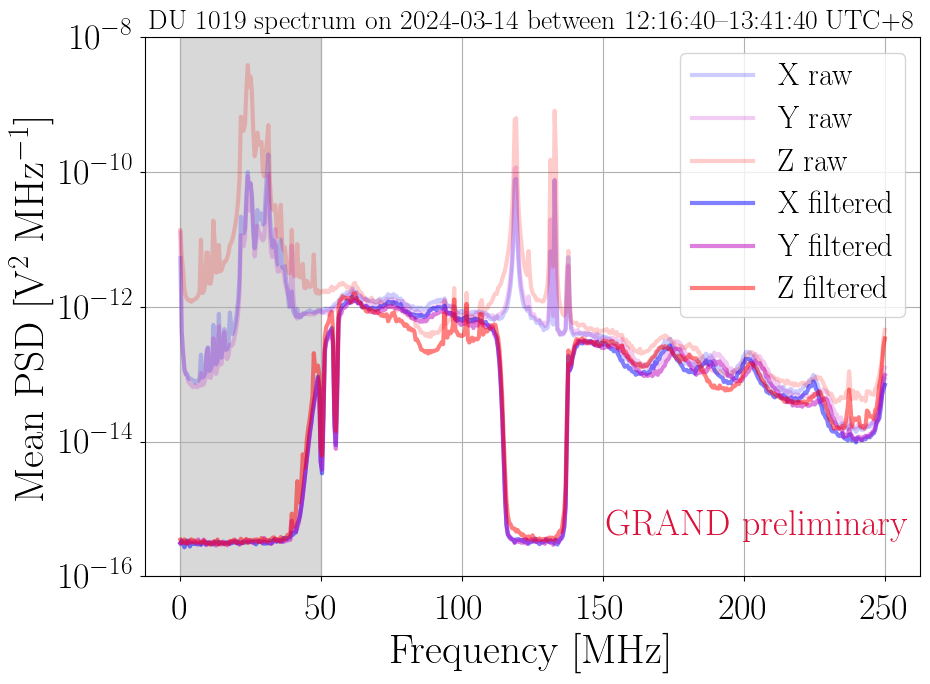

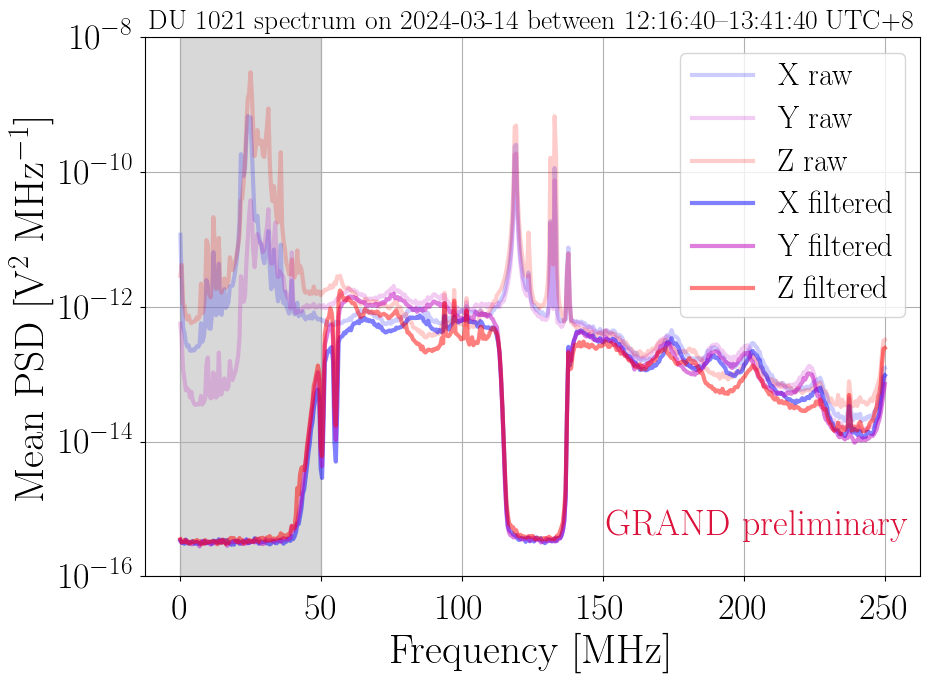

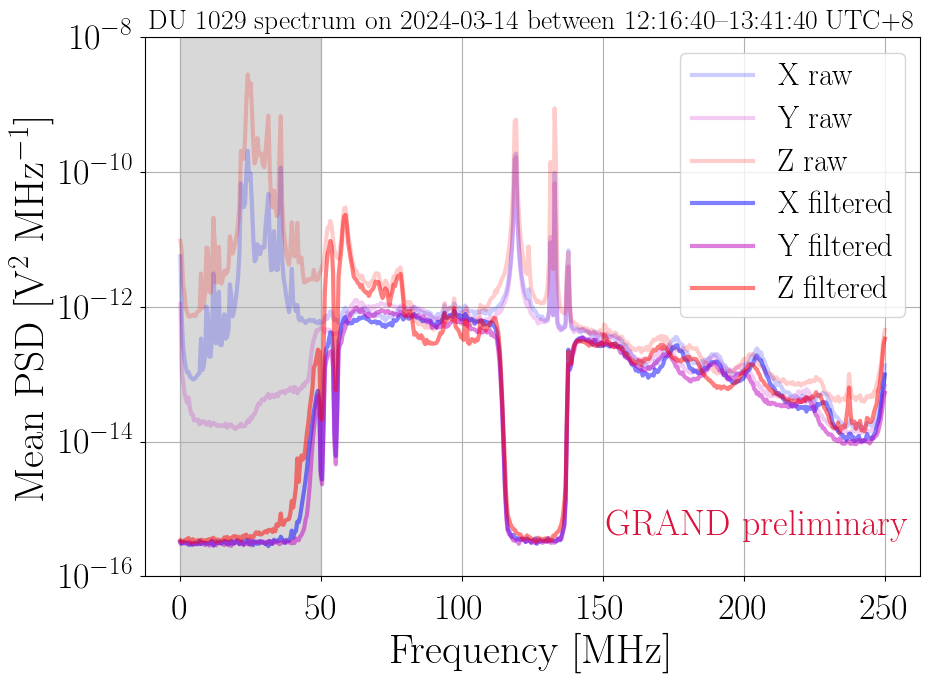

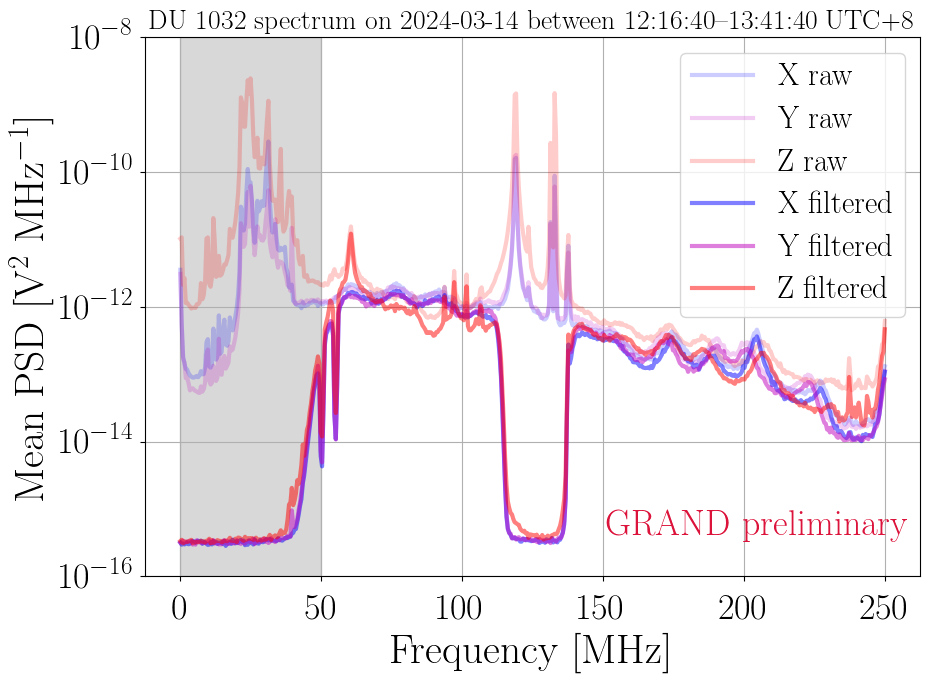

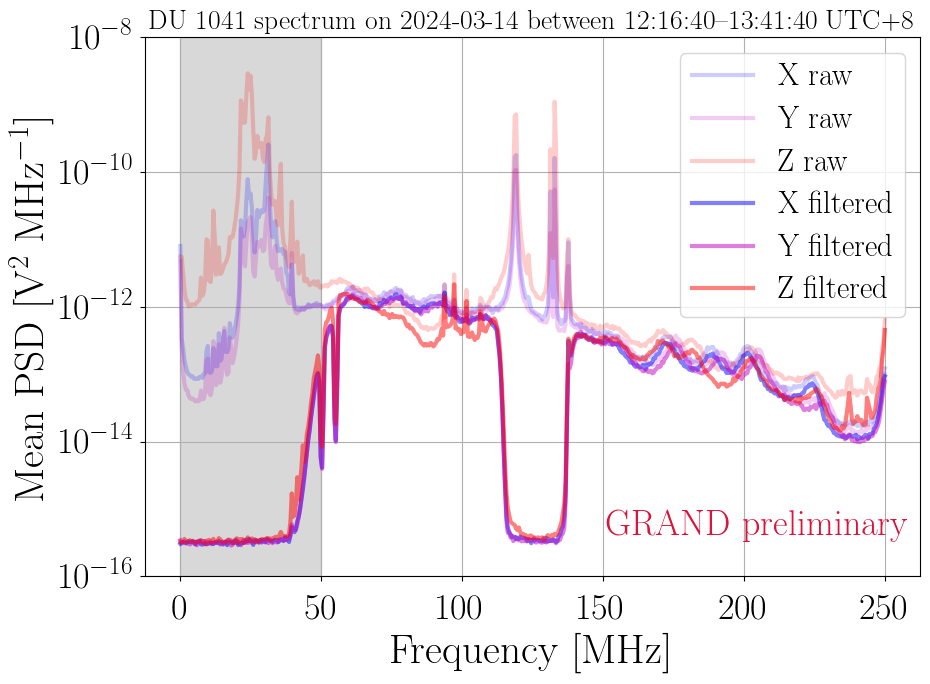

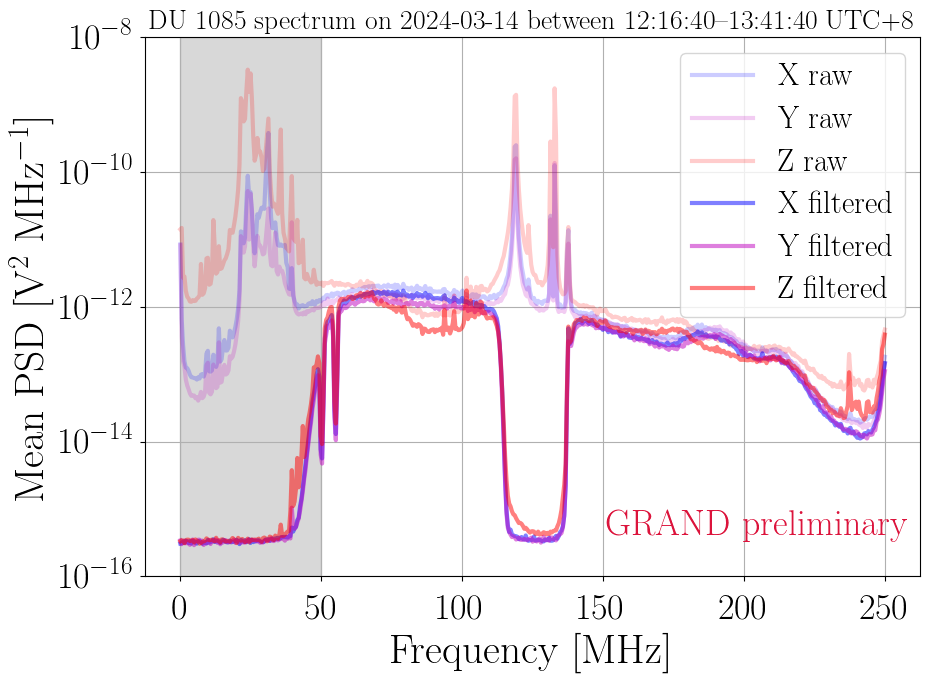

In [12]:
for du in mask_dict.keys():
    mean_fft_du          = np.mean( np.abs( fft[ mask_dict[du] ]**2 ),axis=0 )
    mean_fft_du_filtered = np.mean( np.abs( fft_filtered[ mask_dict[du] ]**2 ),axis=0 )

    for ch in range(mean_fft_du.shape[0]):
        plt.plot(freq,psd_norm*mean_fft_du[ch]*1e-12,alpha=.2,label=f'{channels[ch]} raw',color=colors[ch])
        
    for ch in range(mean_fft_du.shape[0]):
        plt.plot(freq,psd_norm*mean_fft_du_filtered[ch]*1e-12,alpha=.5,label=f'{channels[ch]} filtered',color=colors[ch])

    plt.axvspan(0,50,color='grey',alpha=.3)

    plt.yscale('log')
    plt.ylim(1e-16,1e-8)
    
    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'Mean PSD [$\mathrm{V^2~ MHz^{-1}}$]')
    # title = r'\texttt{' + os.path.basename(root_file) + r'}' + f': DU {du}'
    # plt.title(title,fontsize=13)

    plt.text(151,4e-16,'GRAND preliminary', color='crimson')

    title = f'DU {du} spectrum on {start_time.date()} between {start_time.time()}--{end_time.time()} UTC+8'
    plt.title(title,fontsize=20)

    plt.legend(frameon=True,framealpha=.8,fontsize=22)

    if savefig:
        plot_name = f'psd_du_{du}_{start_time.date()}_{start_time.time()}' #+ param_str
        
        plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
        plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

    plt.show()

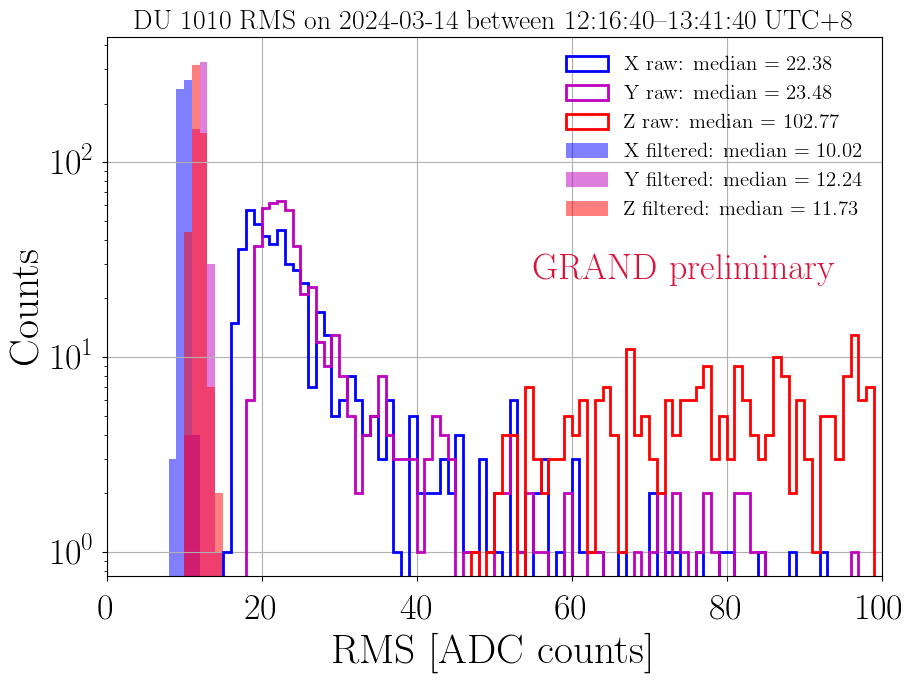

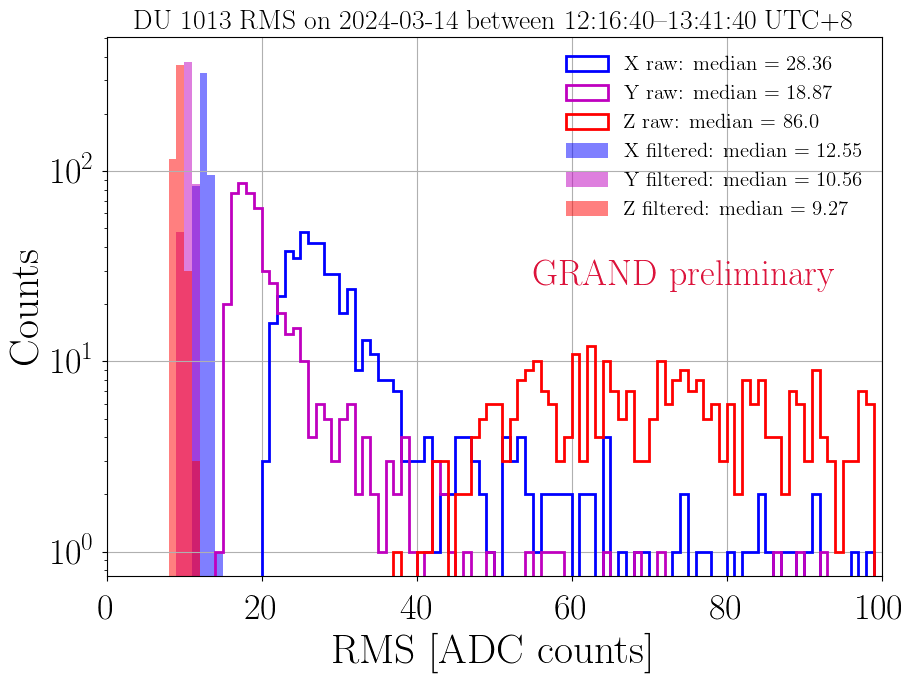

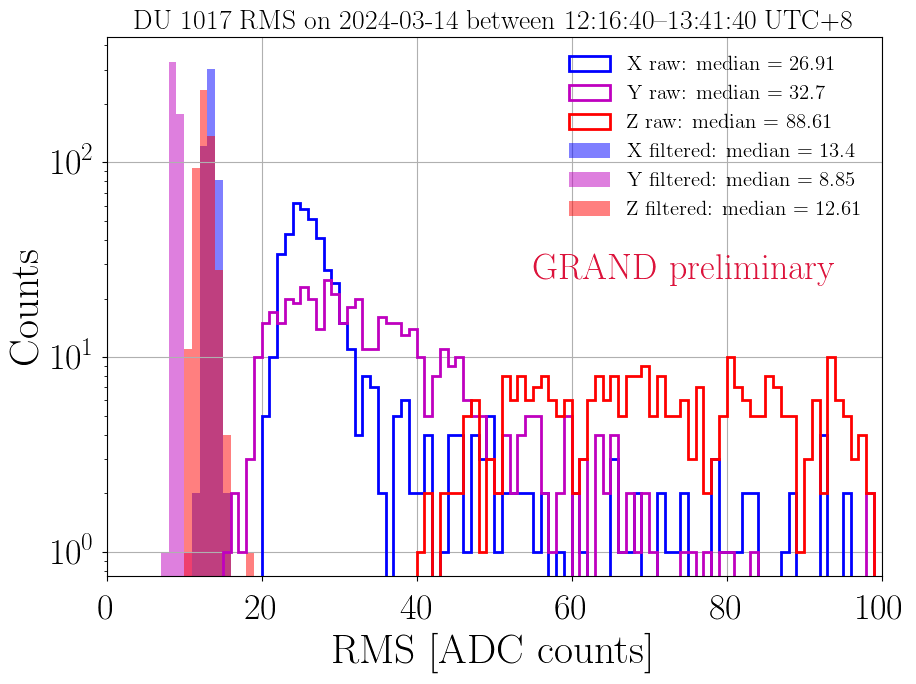

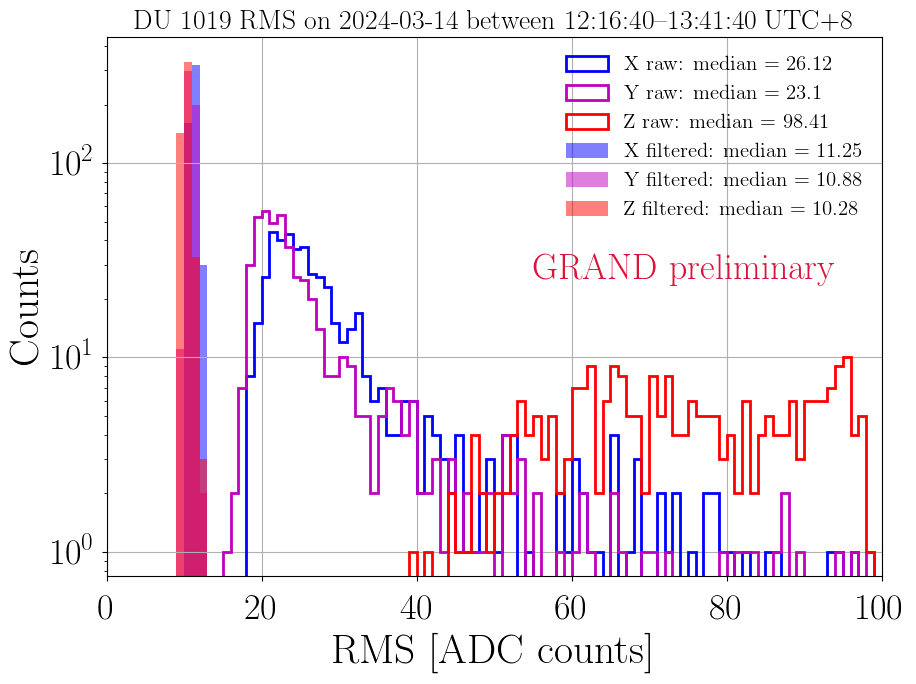

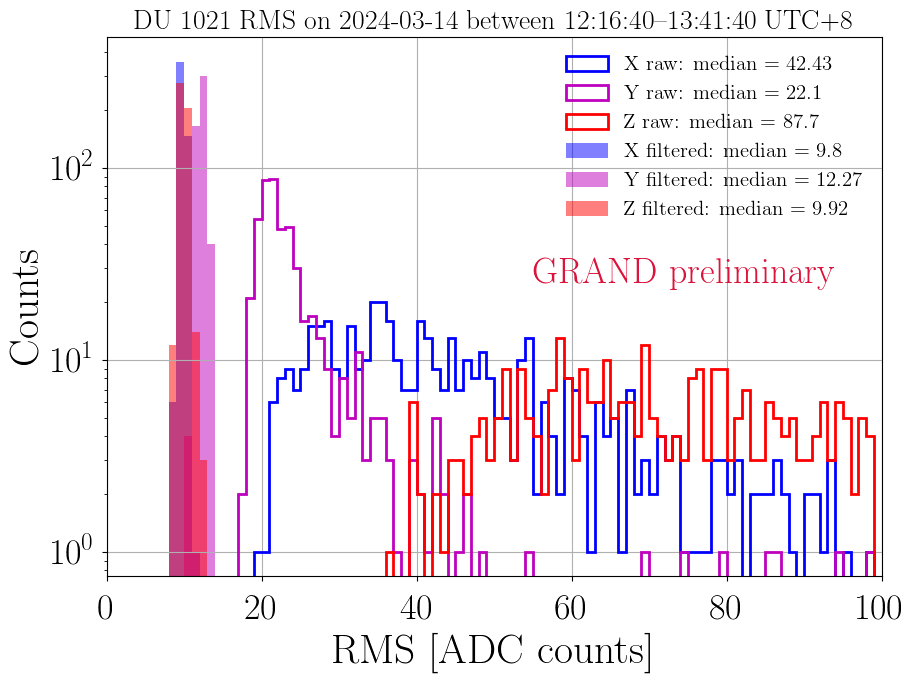

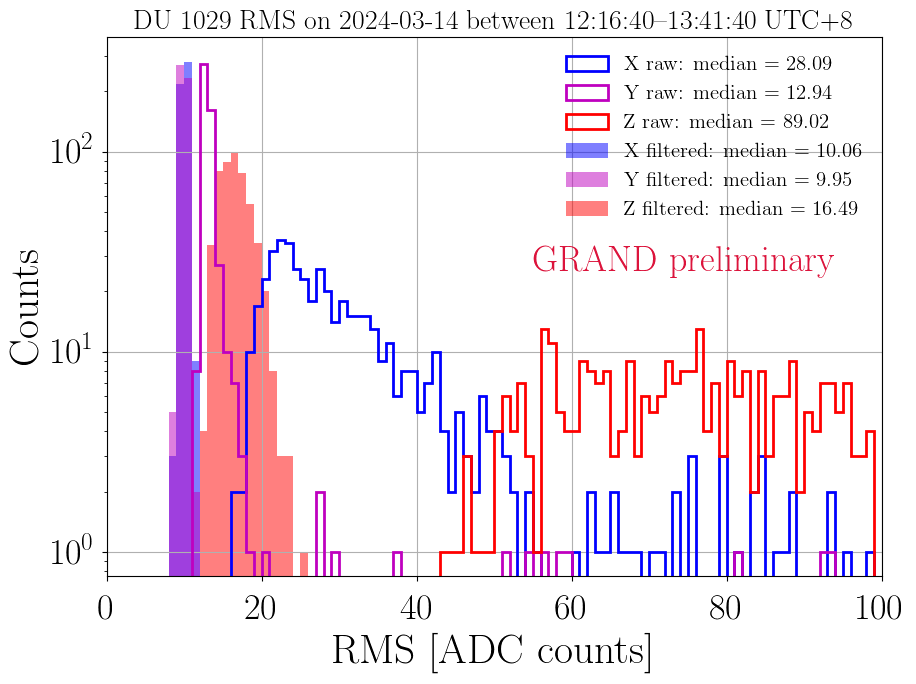

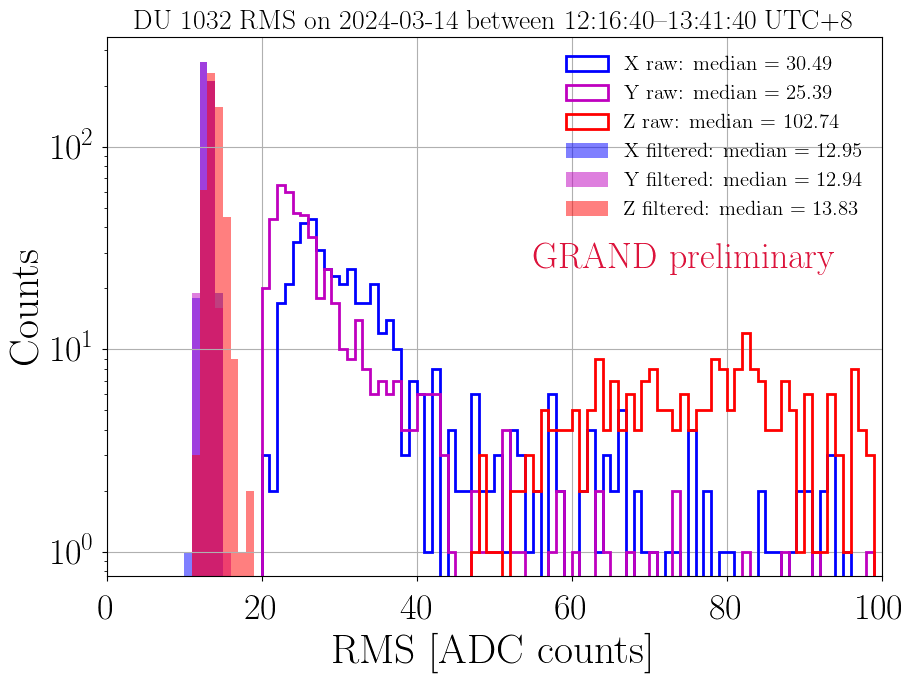

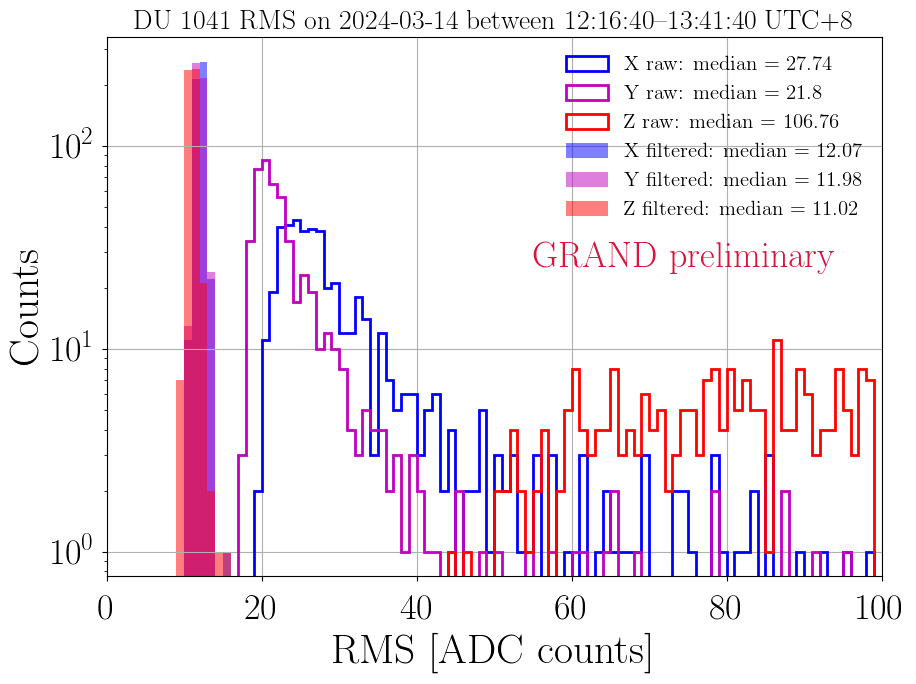

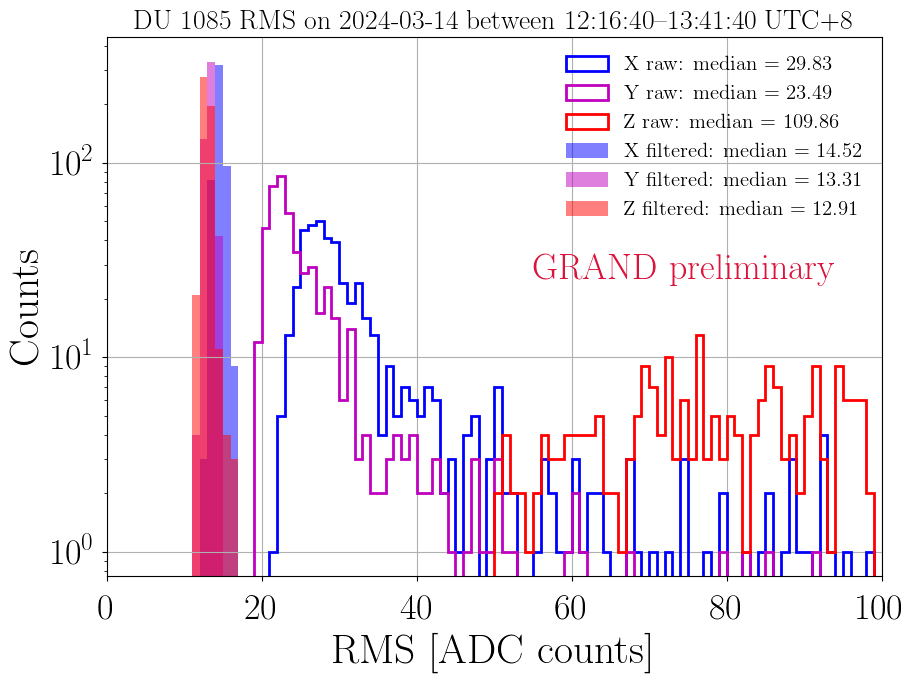

In [11]:
bins = np.arange(0,100)

for du in mask_dict.keys():
    rms_du = rms[ mask_dict[du] ]

    for ch in range(rms_du.shape[1]):
        median = np.median(rms_du[:,ch])
        plt.hist(rms_du[:,ch],bins=bins,label=f'{channels[ch]} raw: median = {np.round(median,decimals=2)}',color=colors[ch],histtype='step',linewidth=2)

    rms_filt_du = rms_filtered[ mask_dict[du] ]

    for ch in range(rms_filt_du.shape[1]):
        median_filt = np.median(rms_filt_du[:,ch])
        plt.hist(rms_filt_du[:,ch],bins=bins,alpha=.5,label=f'{channels[ch]} filtered: median = {np.round(median_filt,decimals=2)}',color=colors[ch])

    plt.yscale('log')
    plt.xlim([0,100])
    plt.xlabel('RMS [ADC counts]')
    plt.ylabel('Counts')


    # title = r'\texttt{' + os.path.basename(root_file) + r'}' + f': DU {du}'
    # plt.title(title,fontsize=13)

    plt.text(55,2.5e1,'GRAND preliminary', color='crimson')

    title = f'DU {du} RMS on {start_time.date()} between {start_time.time()}--{end_time.time()} UTC+8'
    plt.title(title,fontsize=20)

    plt.legend(fontsize=15)

    if savefig:
        plot_name = f'rms_du_{du}_{start_time.date()}_{start_time.time()}' #+ param_str
        
        plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
        plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

    plt.show()

In [27]:
importlib.reload(tools)

npz_file = '/sps/grand/pcorrea/nutrig/datasets/bkg/gp13_raw/GP13_20240301_085053_RUN125_MD_RAW_10s_ChanXYZ_20dB_11DUs_test_137_dat.npz'

f = np.load(npz_file)

tools.get_masks_du(f['du_ids'])

In [16]:
x = np.arange(20240116,20240131+1)
x = np.hstack( (x, np.arange(20240201,20240229+1) ) )
x = np.hstack( (x, np.arange(20240301,20240331+1) ) )
x = np.hstack( (x, np.arange(20240401,20240430+1) ) )

np.hstack((x[::5],x[-1]))

array([20240116, 20240121, 20240126, 20240131, 20240205, 20240210,
       20240215, 20240220, 20240225, 20240301, 20240306, 20240311,
       20240316, 20240321, 20240326, 20240331, 20240405, 20240410,
       20240415, 20240420, 20240425, 20240430, 20240430])

In [27]:
root_files[1000]

'/sps/grand/data/gp13/GrandRoot/2024/04/GP13_20240404_001813_RUN129_MD_RAW_10s_ChanXYZ_20dB_DU10_DU13_DU85_4096points_test_020.root'

In [3]:
f = np.load('./GP13_20240301_174613_RUN125_MD_RAW_10s_ChanXYZ_20dB_11DUs_test_144_dat.npz')

In [2]:
x = np.arange(4)
x = x[:-1]
x

array([0, 1, 2])

In [62]:
n_max = 509*1.648e-6*1e3
n_max

0.838832